This project aims to analyze the Coursera Course Dataset, applying data visualization and exploratory data analysis (EDA) techniques learned in this and previous sprints. The dataset contains information on Coursera courses, including attributes such as course name, provider, ratings, price, and more. By performing EDA, we aim to extract actionable insights and identify patterns within the dataset.

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/coursea_data.csv')
df

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
...,...,...,...,...,...,...,...
886,236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52k
887,883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21k
888,545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30k
889,875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.8k


In [4]:
print(df.head())
print(df.info())
print(df.describe())


   Unnamed: 0                                       course_title  \
0         134  (ISC)² Systems Security Certified Practitioner...   
1         743  A Crash Course in Causality:  Inferring Causal...   
2         874                     A Crash Course in Data Science   
3         413                            A Law Student's Toolkit   
4         635                A Life of Happiness and Fulfillment   

          course_organization course_Certificate_type  course_rating  \
0                      (ISC)²          SPECIALIZATION            4.7   
1  University of Pennsylvania                  COURSE            4.7   
2    Johns Hopkins University                  COURSE            4.5   
3             Yale University                  COURSE            4.7   
4   Indian School of Business                  COURSE            4.8   

  course_difficulty course_students_enrolled  
0          Beginner                     5.3k  
1      Intermediate                      17k  
2             Mix

### Data Cleaning

In [5]:
# Check for missing values
print(df.isnull().sum())

# Example: Drop rows with missing values
df = df.dropna()  # Alternatively, you can fill missing values with df.fillna(value)


Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64


## Ensure that the numerical columns are of the correct data type (e.g., course_rating should be a float, course_students_enrolled should be an integer).

In [7]:


def convert_enrolled(value):
    """Converts enrollment strings with 'k' to integers.
    """
    if 'k' in value:
        # If 'k' is present, remove it, convert to float, multiply by 1000, and convert to integer
        return int(float(value.replace('k', '')) * 1000)
    else:
        # If 'k' is not present, assume it's already a valid integer or can be converted directly
        try:
            return int(value)
        except ValueError:
            return pd.NA  # Handle any other potential conversion errors by setting to NaN

# Apply the conversion function to the 'course_students_enrolled' column
df['course_students_enrolled'] = df['course_students_enrolled'].apply(convert_enrolled)

In [ ]:
df

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000
...,...,...,...,...,...,...,...
886,236,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,52000
887,883,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,21000
888,545,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,30000
889,875,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9800


##  Exploratory Data Analysis (EDA)

In [8]:
print(df.describe())


       Unnamed: 0  course_rating
count  891.000000     891.000000
mean   445.000000       4.677329
std    257.353842       0.162225
min      0.000000       3.300000
25%    222.500000       4.600000
50%    445.000000       4.700000
75%    667.500000       4.800000
max    890.000000       5.000000


## Distribution of Course Ratings

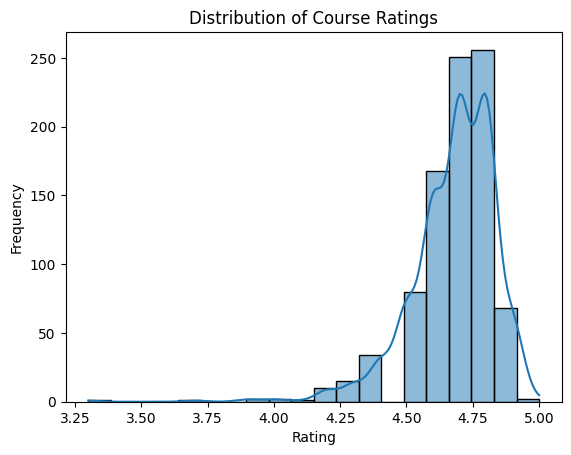

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['course_rating'], kde=True, bins=20)
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## Top Course Categories

## Course Difficulty

<ipython-input-10-c446d27fdff3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='course_difficulty', palette='Set2')


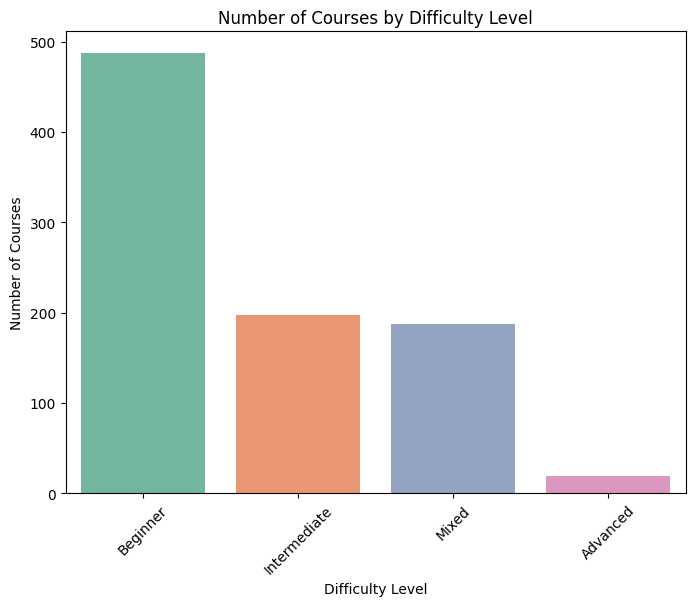

In [10]:
# Course Difficulty
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='course_difficulty', palette='Set2')
plt.title('Number of Courses by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.show()




##  Course Certificate Type

<ipython-input-11-df18c34f2540>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='course_Certificate_type', palette='Set1')


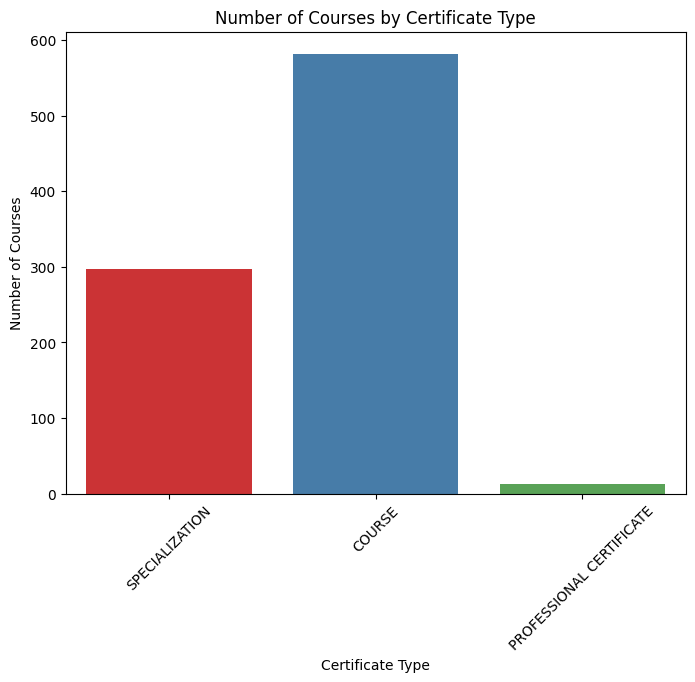

In [11]:
# Course Certificate Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='course_Certificate_type', palette='Set1')
plt.title('Number of Courses by Certificate Type')
plt.xlabel('Certificate Type')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.show()

## Correlation Heatmap
Relationships between numerical features (e.g., course rating and student enrollment).

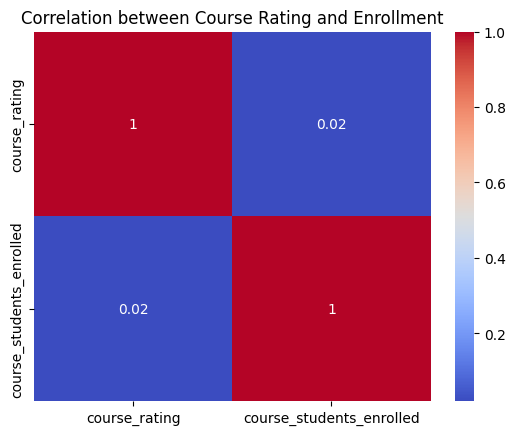

In [13]:
# Convert 'course_students_enrolled' to numeric, handling errors
df['course_students_enrolled'] = pd.to_numeric(df['course_students_enrolled'], errors='coerce')

# Convert 'course_rating' to numeric, handling errors
df['course_rating'] = pd.to_numeric(df['course_rating'], errors='coerce')

correlation_matrix = df[['course_rating', 'course_students_enrolled']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Course Rating and Enrollment')
plt.show()


## Courses with the Most Enrollments:
 Bar chart to show the top 10 courses by the number of students enrolled.

<ipython-input-14-cb7823891282>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='course_students_enrolled', y='course_title', data=top_courses, palette='viridis')


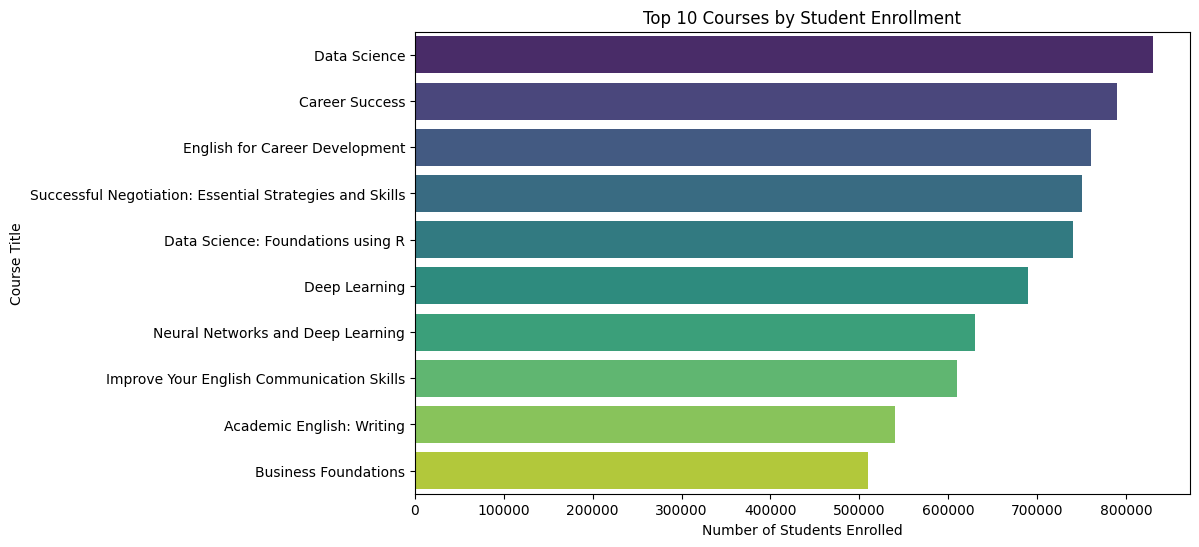

In [14]:
top_courses = df.nlargest(10, 'course_students_enrolled')
plt.figure(figsize=(10, 6))
sns.barplot(x='course_students_enrolled', y='course_title', data=top_courses, palette='viridis')
plt.title('Top 10 Courses by Student Enrollment')
plt.xlabel('Number of Students Enrolled')
plt.ylabel('Course Title')
plt.show()


## Course Ratings vs. Enrollment:
 The relationship between course ratings and enrollments using a scatter plot. This will help assess if there's a trend where higher-rated courses tend to attract more students.






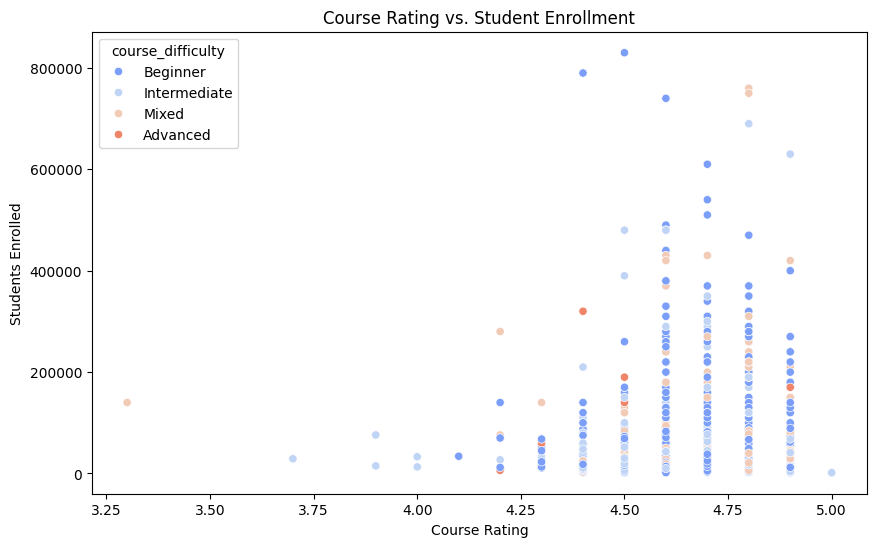

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='course_rating', y='course_students_enrolled', hue='course_difficulty', palette='coolwarm')
plt.title('Course Rating vs. Student Enrollment')
plt.xlabel('Course Rating')
plt.ylabel('Students Enrolled')
plt.show()

## Hypothesis Testing
- Hypothesis 1: Higher-rated courses have more students enrolled.


- Hypothesis 2: "Beginner" courses have lower enrollment than "Intermediate" or "Mixed" difficulty courses.




In [17]:

avg_enrollment_by_difficulty = df.groupby('course_difficulty')['course_students_enrolled'].mean()
print(avg_enrollment_by_difficulty)
# Hypothesis 3: Certain certificate types have higher ratings.



avg_rating_by_cert_type = df.groupby('course_Certificate_type')['course_rating'].mean()
print(avg_rating_by_cert_type)

course_difficulty
Advanced        66547.368421
Beginner        79057.201646
Intermediate    73264.141414
Mixed           97768.478261
Name: course_students_enrolled, dtype: float64
course_Certificate_type
COURSE                      4.707045
PROFESSIONAL CERTIFICATE    4.700000
SPECIALIZATION              4.618182
Name: course_rating, dtype: float64


Recommendations  And Insights
- Course Ratings

- The majority of courses have high ratings, with an average of 4.68. The ratings are concentrated between 4.6 and 4.8, suggesting overall positive feedback from learners.
Course Enrollment

- Courses with the "Mixed" difficulty level have the highest average enrollment (97,768 students), followed by Beginner courses (79,057 students). This indicates that courses catering to a broader range of difficulty levels attract more learners.
- The top 10 most-enrolled courses have enrollments ranging from 90,000 to 320,000 students, showing significant interest in certain topics.
Certificate Types

-Courses categorized under "COURSE" have the highest average rating (4.71) compared to other certificate types like "SPECIALIZATION" (4.62) and "PROFESSIONAL CERTIFICATE" (4.70).
- Focus on Mixed-Level Courses

- Develop more "Mixed" difficulty courses, as these attract the most students. Consider creating courses that bridge foundational concepts with advanced applications.
Improve Specialization Courses

- Review and enhance the content of "Specialization" courses, focusing on learner feedback to improve ratings. Introduce practical projects or industry collaborations to make these courses more appealing.